In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
# pip install konlpy

In [3]:
# 저장한 리뷰 정보 불러오기
df = pd.read_csv('./review_dataset.csv', encoding = 'utf-8-sig')
df = df.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
df

,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,1,20200414,2020,4,14,4,Google 사용자,평소에 생각하지 않고 먹었던 음식을 신호등 색깔로 표시해서 덜먹여야하고 더먹어도 좋...
1,2,20220920,2022,9,20,4,daldal,"눔에서 제공하는 식단 기록이나 코치님과의 소통, 피드백 등은 굉장히 만족스럽습니다...."
2,3,20220902,2022,9,2,4,나현지,전체적인 기능과 추구하는 식단 방향 모두 건강한 식습관 형성으로 매우 만족스럽지만 ...
3,4,20220811,2022,8,11,3,Jina.H,앱이 일단 좋게말하면 심플하고 나쁘게 말하면 뭐가 없고 한눈에 점검이 안됩니다.. ...
4,5,20221019,2022,10,19,1,S.Y. JANG,로그인 진행중에 화면이 하얗게 바뀌고 멈춤현상이 지속됩니다. 이거때문에 메일보내도 ...
...,...,...,...,...,...,...,...,...
5995,5996,20140308,2014,3,8,3,Google 사용자,개굿
5996,5997,20140309,2014,3,9,4,Google 사용자,개굿
5997,5998,20140311,2014,3,11,3,Google 사용자,개굿
5998,5999,20140312,2014,3,12,4,Google 사용자,개굿


In [11]:
# 가장 최신의 500개 리뷰 추출
df_set = df.sort_values(by = ['date'], ascending=False).head(500).reset_index(drop=True)

In [12]:
df_set

,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,1429,20221031,2022,10,31,5,Yerim Ko,건강관리 케어 잘 받았습니다
1,49,20221023,2022,10,23,5,이수정,식단개선이 많이 되고 있어요 동기부여도 되고 돈 안아까워요
2,5,20221019,2022,10,19,1,S.Y. JANG,로그인 진행중에 화면이 하얗게 바뀌고 멈춤현상이 지속됩니다. 이거때문에 메일보내도 ...
3,926,20221017,2022,10,17,1,안승민,아무 도움이 안됨
4,6,20221017,2022,10,17,4,힐링아무,혼자서 식단관리와 체중감량 힘들어서 다이어트 어플 찾다가 눔 하게 됐어요. 영양심리...
...,...,...,...,...,...,...,...,...
495,1670,20210126,2021,1,26,1,박지영,빨리환불해주세요
496,1104,20210126,2021,1,26,5,시베리아횡단보도,10년 넘게 제자리를 지켜온 허벅지살. 지방흡입하기 전에 마지막이라는 생각으로 해봤...
497,571,20210126,2021,1,26,5,ALPHA Q Inc.,새로운 습관이 생기게 해주었어요 채식 위주의 식단 니트운동 등.. 건강을 생각하는 ...
498,464,20210126,2021,1,26,5,원성희,16주 프로그램을 두번이나 재구매 했어요. 식단관리 꾸준히 할 수 있고 코치님의 긍...


In [13]:
okt = Okt()

df_set["nouns"] = df_set["content"].apply(okt.nouns)

In [14]:
df_set.head()

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,nouns
0,1429,20221031,2022,10,31,5,Yerim Ko,건강관리 케어 잘 받았습니다,"[건강, 관리, 케어]"
1,49,20221023,2022,10,23,5,이수정,식단개선이 많이 되고 있어요 동기부여도 되고 돈 안아까워요,"[식단, 개선, 동기부여, 돈]"
2,5,20221019,2022,10,19,1,S.Y. JANG,로그인 진행중에 화면이 하얗게 바뀌고 멈춤현상이 지속됩니다. 이거때문에 메일보내도 ...,"[로그인, 진행중, 화면, 현상, 지속, 거, 때문, 메일, 답장, 다시, 다운]"
3,926,20221017,2022,10,17,1,안승민,아무 도움이 안됨,"[아무, 도움]"
4,6,20221017,2022,10,17,4,힐링아무,혼자서 식단관리와 체중감량 힘들어서 다이어트 어플 찾다가 눔 하게 됐어요. 영양심리...,"[혼자, 식단, 관리, 체중감량, 다이어트, 어플, 눔, 심리, 전문, 코치, 맞춤..."


In [15]:
import itertools

totwords = list(itertools.chain(*df_set['nouns'].to_list()))

In [16]:
words = [n for n in totwords if len(totwords) > 1] # 단어의 길이가 1개인 것은 제외

In [17]:
c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [18]:
import os
FONT_PATH = os.environ.get("FONT_PATH", "/System/Library/Fonts/AppleSDGothicNeo.ttc")

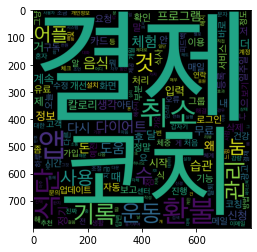

In [24]:
wc = WordCloud(font_path=FONT_PATH, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)